# Recognizing dogs and cats

## Author of the correction : M. Sibué

The purpose of this laboratory is to build a first end to end reflex-based AI model to teach computers to [**understand images**](https://www.ted.com/talks/fei_fei_li_how_we_re_teaching_computers_to_understand_pictures).

In particular, the objective of this lab is to write an AI application able to recognize cats and dogs on images. Your application will take an image as input and will be able to say wheter the image contains a dog or a cat. You will work with the data of the [**Dogs vs Cats**](https://www.kaggle.com/c/dogs-vs-cats) competition from Kaggle. This competition was launched in 2013 and the first place was obtained by [Pierre Sermanet](https://research.google.com/pubs/PierreSermanet.html), actually Research Scientist at Google Brain, by using the [Overfeat](http://cilvr.nyu.edu/doku.php?id=software:overfeat:start#overfeatobject_recognizer_feature_extractor) deep learning library he wrote during his PhD at New York University under the supervision of [Yann Le Cun](http://yann.lecun.com/), Director of AI Research at Facebook. He obtained $1.09%$ of classification errors. Try to do your best to approach this score!!!

Two approaches will be used to adress this problem :
1. A traditional pattern recognition model in which hand-crafted features are extracted from images and used to represent them and to train classifiers.
2. A modern representation learning approach in which deep convolutional neural networks (CNN) are used to learn the image representations.

 

##  Learning outcomes
+ Building an end to end supervised machine learning pipeline : input data (training set) preparation, training (model learning), validation sets, cross-validation, hyper-parameter tuning, evaluation on the testing dataset.
+ Getting familiar with deep learning for image classification : model building and training, transfer learning, fine-tuning.
+ Getting familiar with some well-known librairies:
    + Machine learning : Scikit-learn ([http://scikit-learn.org/stable/](http://scikit-learn.org/stable/))
    + Deep learning: Keras ([https://keras.io/](https://keras.io/))
    + Computer vision : Scikit-image ([http://scikit-image.org/](http://scikit-image.org/) or OpenCV ([http://opencv.org/](http://opencv.org/))
    
**The final objective of this laboratory is to be aware to the potential but also to the limitations of reflex-based AI approaches towards visual recognition tasks.**
    

## Part 0 : Requirements
A set of packages will be useful to handle the first part of this study case.

    pip install -r requirements.txt

In [1]:
!pip install -r requirements.txt

## Part 1 : A small tutorial on image classification

In this section, we will briefly introduce the image classification problem which consists in assigning to an input image one label from a fixed set of labels and which is one of the big challenge of computer vision and artifial intelligence. In our case, we will only consider two labels $\{dog, cat\}$. This small tutorial also aims at familiarizing you with machine learning and computer vision librairies that we will used in this course :
+ Scikit-Learn : [http://scikit-learn.org/stable/](http://scikit-learn.org/stable/)
+ OpenCV : [http://opencv.org/](http://opencv.org/) or Scikit-image ([http://scikit-image.org/](http://scikit-image.org/)).

![ImageCat](images/Diapositive1.jpg)

While the task of image classification is very easy for a human, we have to face with several challenge to build our automatic recognition algorithm among whom:

+ Viewpoint variation.
+ Scale variation.
+ Illumination conditions variation.
+ Deformation.
+ Occlusion.
+ Backgroud clutter.
+ Intraclass variation.

![ImageCatwithvariations](./images/Diapositive2.jpg)

![ImageCatwithocclusion](./images/Diapositive3.jpg)

Source : Images from the CS231n course of Stanford (Convolutional Neural Networks for Visual Recognition)












### A simple image classification pipeline

To built our image classification algorithm, we will follow the principle of a machine learning approach for image classification which consists in :
1. Collecting and preparing a dataset of images and their corresponding labels.
2. Using a machine learning algorithm to train a classifier.
3. Evaluate the classifier on new images.


![ImageClassificationpipeline](images/testphase.png)

#### Having a look on the available data

First, you have to  download the dataset that will be used to train and test our model. Before downloading the data, create a subdirectory in your working folder called data. Then download [DataDogsCatsChallenge.zip](https://filesender.renater.fr/?s=download&token=cd3d55af-2563-47c4-af3c-28a4eba661e7) into that directory and unzip it. This dataset contains 25,000 labelled dog and cat photos available for training, and 12,500 in the test set that we have to try to label for the Kaggle competition.

As we have seen in the lecture note, the standard practice in machine learning is to split the available data into at least two different subsets :
+ The **training set** : to learn the model.
+ The **testing set** : to evaluate the learned model.

You have also seen that is the also standard to add a third set to the split to build a **validation set** that will be used to fine-tune the parameters of the model.

I you have a look on the DogsCatsChallenge directory, you will see that the preparation of the data have been done and that the test and train sets are in separate subdirectories in which data for each category (cats and dogs) is also into subdirectories. Nevertheless, there is no validation set and one of your first task will be to build it.

The archive also contains a directory named **sample**. Training and validating the entire dataset can take some time. Therefore, it is a good practice to run first your algorithm on a small sample of your training and validation data before to run it on the entire set of data.


##### Image representation

Your first task will be to built a representation of the data, i.e. a feature vector which values quantify the contents of the image. We will see latter that, using Deep Convolutional Neural Networks, we can learn an efficient representation directly using raw pixel intensities as inputs. Here, we will just represent the images by two alternative representations.
+ A first representation is built using the raw data by simply resizing an input image to a fixed size (here $32 \times 32$ pixels) and then by flattening the RBG pixel intensities into a single vectors of numbers.
+ A second representation is built from the color histogram that characterizes the color distribution of the image. For this representation a color conversion into the HSV color space could be useful.

**Complete the functions below to build such representations**

Some helping functions :
+ With Numpy:
    + [Array flattening](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.flatten.html)
    
+ With OpenCV:

     + [Geometric transformations on images](http://docs.opencv.org/trunk/da/d6e/tutorial_py_geometric_transformations.html) 
     + [Colorspace conversion](http://docs.opencv.org/trunk/df/d9d/tutorial_py_colorspaces.html) 
     + [Histogram in OpenCV](http://docs.opencv.org/trunk/de/db2/tutorial_py_table_of_contents_histograms.html)
    
+ With Scikit-image :
    + [Loading an image from a file](https://scikit-image.org/docs/stable/user_guide/data_types.html)
    + [Image transformations](https://scikit-image.org/docs/dev/user_guide/transforming_image_data.html)
    + [Colorspace conversion](https://scikit-image.org/docs/dev/user_guide/transforming_image_data.html#color-manipulation)
     
    

Le code ci-dessous charge les dépendances utiles pour la suite.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os

In [3]:
# TO DO : complete other import modules
def image_to_feature_vector(image, size=(32, 32)):
    # resize the image to a fixed size, then flatten the image into a list of raw pixel intensities

    # fait un center crop
    cropped_image = cv2.resize(image, size, interpolation = cv2.INTER_CUBIC)
    # flatten l'image en une liste de pixels
    feature_vector = list(cropped_image.flatten())

    return feature_vector



def build_HSV_color_histogram_vector(image,bins=(8, 8, 8)):
    # extract a 3D color histogram from the HSV color space using the supplied number of `bins` per channel and return it as a feature vector

    # conversion dans le hsv colorspace pour l'image
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # conversion en histogramme 3D de l'image dans le hsv colorspace
    histo = cv2.calcHist([hsv_image], [0,1,2], None, bins, [0,256,0,256,0,256])
    # flatten l'histo 3D en une liste
    feature_vector = list(histo.flatten())
    
    return feature_vector



#### Dataset prepatation and feature extraction
The dataset has to be prepared for feature extraction :
+ Three lists will be initialized to store the raw pixel representation, the color distribution (histogram) representation and the class labels themselves.
+ Then, the lists will be completed by extracted the features from the dataset (don't forgot to begin by testing your program on the sample dataset before to apply it on the whole dataset).

For this step, we can used the paths.py file [here](https://github.com/jrosebr1/imutils/blob/master/imutils/paths.py)




In [4]:
from paths import *

print("Describing images...")
imagePaths = list(list_images('./data/DogCatChallenge/sample'))

# initialize the raw pixel intensities matrix, the features matrix and labels list
"""
rawImages_features = []
histogram_features = []
labels = []
"""

def build_dataset(imagePaths):

    rawImages_features = []
    histogram_features = []
    labels = []

    for path in imagePaths:
        image = cv2.imread(path)
        rawImage_feature = image_to_feature_vector(image)
        histogram_feature = build_HSV_color_histogram_vector(image)
        string_label = path.split('/')[-2]
        label = 0 if string_label == "dogs" else 1  # label 0 pour les chiens et 1 pour les chats
        # on suppose qu'il n'y a pas d'erreurs dans la constitution des sous-dossiers

        rawImages_features.append(rawImage_feature)
        histogram_features.append(histogram_feature)
        labels.append(label)
        
    return rawImages_features, histogram_features, labels


rawImages_features, histogram_features, labels = build_dataset(imagePaths)

Describing images...


In [5]:
len(rawImages_features[0])  # OK donne bien 32*32*3

3072

In [6]:
len(histogram_features[0])

512

Sur tout le dataset :

In [7]:
imagePaths_train = list(list_images('./data/DogCatChallenge/train'))

rawImages_features_train, histogram_features_train, labels_train = build_dataset(imagePaths_train)

In [8]:
len(rawImages_features_train)

23000

In [9]:
imagePaths_val = list(list_images('./data/DogCatChallenge/valid'))

rawImages_features_val, histogram_features_val, labels_val = build_dataset(imagePaths_val)

In [10]:
len(rawImages_features_val)

2000

#### Dataset splitting into training and validation dataset

The last common step in machine learning will be to split the training dataset into training dataset and validation dataset. For this, you could use some functions from scikit-learn :

  + [Cross validation](http://scikit-learn.org/stable/modules/cross_validation.html)
    
    
 In our case, the split of the dataset into training, validation and test set has been done but you can try to build another sample dataset using the fonctions of scikit-learn. In particular, if you are note familiar to **cross validation**, take the time to read carefully the previous documentation.

In [11]:
from sklearn.model_selection import train_test_split

sub_rawImages_features_train, sub_rawImages_features_val, sub_histogram_features_train, sub_histogram_features_val, sub_labels_train, sub_labels_val = train_test_split(rawImages_features_train, histogram_features_train, labels_train, test_size=0.2, random_state=42)
# on s'assure de bien shuffler les données


In [12]:
len(sub_rawImages_features_train)

18400

Ce qui vaut bien 0.8*23000

#### Classification using the K-Nearest Neighbor (k-NN) classifier


In order to build this simple image classification pipeline, you will use the k-Nearest Neighbor (k-NN) classifier which is a very simple machine learning/image classification approach, rarely used in practice but its simplicity will enable you to get quickly an idea of the image classification pipeline.

The principle of the [k-NN classifier](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) can be summarize by the following principle : “Tell me who your neighbors are, and I’ll tell you who you are”. Given an unknown image and a training dataset, the k-NN classifier will compare this image to every single image of the training dataset and will predict the label by finding the most common class among the k-closest examples.

Thus to apply the k-nearest Neighbor classification, we need to define a distance metric or a similarity function. For the sake of simplicity, here we will consider the euclidian distance but other distances can be used according to the targeted type of data.

$d(\mathbf{p},\mathbf{q})=\sqrt{\sum_{i=1}^{N}(q_i-p_i)^2}$

with $\mathbf{p}$ and $\mathbf{q}$ two data vectorial representations.

You can now train and predict a k-Nearest Neighbor classifier on your different splits. Once again, we suggest you to have a look on the scikit-learn documentation :
+ [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
+ [Example](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)
+ [An introduction to machine learning with scikit-learn](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#learning-and-predicting)


Désormais, on se cantonne à une petite partie du dataset pour entrainer notre kNN (sinon, trop long)

In [13]:
X_raw_train = sub_rawImages_features_train[:1000]
X_color_train = sub_histogram_features_train[:1000]
y_train = sub_labels_train[:1000]

X_raw_val = sub_rawImages_features_val[:200]
X_color_val = sub_histogram_features_val[:200]
y_val = sub_labels_val[:200]

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# training and evaluation of a k-NN classifer on the raw pixel representation
kNN_raw_pix = KNeighborsClassifier() # on commence avec les paramètres par défaut

kNN_raw_pix.fit(X_raw_train, y_train)

y_raw = kNN_raw_pix.predict(X_raw_val)
accuracy_raw = accuracy_score(y_val, y_raw)

print("Raw pixel representation accuracy: " + str(accuracy_raw))


# training and evaluation of  a k-NN classifer on the color histogram representation
kNN_color_histo = KNeighborsClassifier() # on commence avec les paramètres par défaut

kNN_color_histo.fit(X_color_train, y_train)

y_color = kNN_color_histo.predict(X_color_val)
accuracy_color = accuracy_score(y_val, y_color)

print("Color histogram representation accuracy " + str(accuracy_color))


Raw pixel representation accuracy: 0.55
Color histogram representation accuracy 0.595


**Take the time to compare and to discuss with the others your obtained score !**

On constate que, sur les données de validation, le pre-processing utilisant la conversion en hsv puis histogramme semble apporter un plus au niveau de la précision. En revanche, un tel score reste très peu satisfaisant (un modèle choisissant la classe au hasard fait presqu'aussi bien...)

#### Validation sets for Hyperparameter tuning

The k-nearest neighbor classifier requires a setting for k. What value have you chosen?  How ? Another parameter of this classifier is the choice of the distance functions we could have used. These choices are called **hyperparameters** and their setting is one of the main issue of the design of many Machine Learning algorithms.

To choose these hyperparameter values, the principle is to try out many different values and to see what works best. The main question is on which data ? On the test set ? On the training set ? In fact, the idea is to split your training set in two: a slightly smaller training set, and what we call a **validation set** as explained in the course.

The scikit-learn library has two methods that can perform hyperparameter search and optimization: **Grid search** and **Randomized Search**. Let's have a look on their documentations :
 + [Tuning the hyper-parameters of an estimator](http://scikit-learn.org/stable/modules/grid_search.html)
 
 
You will now apply these two methods to tune the hyperparameters of our k-NN classifier :
 1. First, define a dictionary of parameters which contains two keys :
     + `n_neighbors` the number of nearest neighbors $k$ in the k-NN algorithm that we will vary in the range $[1, 29]$ (if your sample dataset is sufficient)
     + `metric` the distance function/similarity metric for k-NN that can be either the Euclidean distance either the Manhattan/City block distance.
 2. Then, apply Grid Search and Randomized Search



In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import time

print("Building training/testing split...")

# On reprend le train/val split précédent, SAUF QUE le val fera ici office de test

params = {"n_neighbors": np.arange(1, 29, 1),"metric": ["euclidean", "cityblock"]}

#############
# tune the hyperparameters via a cross-validated grid search of the KNN classifier on raw features
kNN = KNeighborsClassifier()

print("Tuning hyperparameters via grid search on raw features")
clf = GridSearchCV(kNN, params)
start = time.time()
clf.fit(X_raw_train, y_train)
stop = time.time()

# evaluate the best grid searched model on the testing data 
y_raw = clf.predict(X_raw_val)
accuracy_raw = accuracy_score(y_val, y_raw)
print("Raw pixel representation accuracy: " + str(accuracy_raw))

print("Elapsed time during GS: " + str(stop-start))
print("Optimal params: " + str(clf.best_params_) + "\n")


#############
# tune the hyperparameters via a cross-validated randomized search of the KNN classifier on raw features
kNN = KNeighborsClassifier()

print("Tuning hyperparameters via randomized search on raw features")
clf = RandomizedSearchCV(kNN, params)
start = time.time()
clf.fit(X_raw_train, y_train)
stop = time.time()

# evaluate the best grid searched model on the testing data 
y_raw = clf.predict(X_raw_val)
accuracy_raw = accuracy_score(y_val, y_raw)
print("Raw pixel representation accuracy: " + str(accuracy_raw))

print("Elapsed time during GS: " + str(stop-start))
print("Optimal params: " + str(clf.best_params_) + "\n")



#############
# tune the hyperparameters via a cross-validated grid search of the KNN classifier on histo features
kNN = KNeighborsClassifier()

print("Tuning hyperparameters via grid search on histo features")
clf = GridSearchCV(kNN, params)
start = time.time()
clf.fit(X_color_train, y_train)
stop = time.time()

# evaluate the best grid searched model on the testing data 
y_color = clf.predict(X_color_val)
accuracy_color = accuracy_score(y_val, y_color)
print("Histo color representation accuracy: " + str(accuracy_color))

print("Elapsed time during GS: " + str(stop-start))
print("Optimal params: " + str(clf.best_params_) + "\n")



#############
# tune the hyperparameters via a cross-validated randomized search of the KNN classifier on raw features
kNN = KNeighborsClassifier()

print("Tuning hyperparameters via randomized search on histo features")
clf = RandomizedSearchCV(kNN, params)
start = time.time()
clf.fit(X_color_train, y_train)
stop = time.time()

# evaluate the best grid searched model on the testing data 
y_color = clf.predict(X_color_val)
accuracy_color = accuracy_score(y_val, y_color)
print("Histo color representation accuracy: " + str(accuracy_color))

print("Elapsed time during GS: " + str(stop-start))
print("Optimal params: " + str(clf.best_params_) + "\n")



Building training/testing split...
Tuning hyperparameters via grid search on raw features
Raw pixel representation accuracy: 0.585
Elapsed time during GS: 116.67650294303894
Optimal params: {'metric': 'euclidean', 'n_neighbors': 13}

Tuning hyperparameters via randomized search on raw features
Raw pixel representation accuracy: 0.61
Elapsed time during GS: 12.887411832809448
Optimal params: {'n_neighbors': 15, 'metric': 'euclidean'}

Tuning hyperparameters via grid search on histo features
Histo color representation accuracy: 0.555
Elapsed time during GS: 20.64526104927063
Optimal params: {'metric': 'cityblock', 'n_neighbors': 14}

Tuning hyperparameters via randomized search on histo features
Histo color representation accuracy: 0.59
Elapsed time during GS: 3.3329429626464844
Optimal params: {'n_neighbors': 7, 'metric': 'cityblock'}



On constate qu'il peut tout à fait être utile d'utiliser une randomized search plutôt qu'une grid search pour trouver les hyperparamètres optimaux (aucune raison d'avoir des prédictions optimales précisément en un point de notre grille d'hyperparamètres prédéfinie)

#### Cross-validation

Sometimes, the size of your training data (and therefore also the validation data) is small and, in this case, the technique used for hyperparameter tuning is **cross-validation**. The main principle is to iterate over different validation sets and to average the performance across these. For example, in a 5-fold cross-validation, we split the training data into 5 equal folds, use 4 of them for training, and 1 for validation. We would then iterate over which fold is the validation fold, evaluate the performance, and finally average the performance across the different folds.

The scikit-learn library has also methods for this kind of cross validation :
+ [Cross-validation: evaluating estimator performance](http://scikit-learn.org/stable/modules/cross_validation.html#)

Here, you will just apply  **m-fold cross validation**. In particular, you have to write a 10-fold cross-validation run for the parameter k of our k-NN algorithm on the training dataset. You will just consider old value of $k$ on the range $[1,29]$


 10-fold cross validation on the KNN classifier with raw features
0.506
0.5539999999999999
0.5579999999999999
0.5389999999999999
0.5399999999999999
0.5549999999999999
0.569
0.5690000000000001
0.5480000000000002
0.5510000000000002
0.539
0.5409999999999999
0.543
0.549
Plotting the misclassification error versus k
The optimal number of neighbors is 15


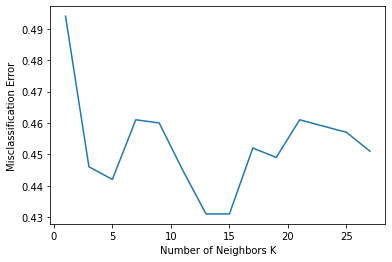

 10-fold cross validation on the KNN classifier with hist features
0.5929999999999999
0.5840000000000001
0.571
0.589
0.5920000000000001
0.587
0.603
0.591
0.5810000000000001
0.594
0.595
0.5810000000000001
0.591
0.5929999999999999
Plotting the misclassification error versus k
The optimal number of neighbors is 13


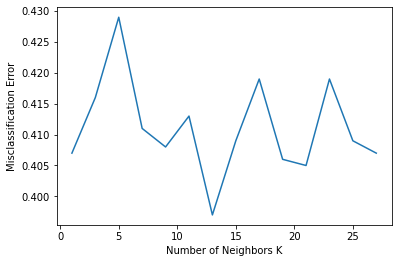

In [16]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


# creating odd list of K for KNN
params = {"n_neighbors": np.arange(1, 29, 2)}

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation on the KNN classifier with raw features
print(" 10-fold cross validation on the KNN classifier with raw features")

for param in params["n_neighbors"]:
    kNN = KNeighborsClassifier(n_neighbors=param)
    cv_score = np.mean(cross_val_score(kNN, X_raw_train, y_train, cv=10))
    print(cv_score)
    cv_scores.append(cv_score)

print("Plotting the misclassification error versus k")
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = params["n_neighbors"][np.argmin(MSE)]



print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(params["n_neighbors"], MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()



# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation on the KNN classifier with raw features
print(" 10-fold cross validation on the KNN classifier with hist features")

for param in params["n_neighbors"]:
    kNN = KNeighborsClassifier(n_neighbors=param)
    cv_score = np.mean(cross_val_score(kNN, X_color_train, y_train, cv=10))
    print(cv_score)
    cv_scores.append(cv_score)

print("Plotting the misclassification error versus k")
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = params["n_neighbors"][np.argmin(MSE)]

print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(params["n_neighbors"], MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()







#### Summary of Part 1

    
+ <span style="background-color:lightgreen">Introduction of the problem of **Image Classification** </span>.
+ <span style="background-color:lightgreen">Introduction and building of a **first simple classifier: the k-NN classifier**.</span> As seen, this classifier is very simple to implement and understand and one of its advantage is that is take no time to train since the training step consists in the storing and the indexing of the training data. Nevertheless, the test time should be expensive since it consists in comparing the target data to every training data. **This behavior is contrary to what is expected** since, in practice, we are often more careful with the test time efficiency that to the training time one.
+ <span style="background-color:lightgreen">Introduction of the **supervised machine learning basic pipeline** : preparation of the data and splitting into **training, validation and test sets**, **training of a model** on a labelled training dataset, **hyperparameters tuning** on the validation set, **evaluation of the model accuracy** on the test set.</span>
+ <span style="background-color:lightgreen">Introduction to the **cross-validation** procedure.</span>


<span style="background-color:lightblue"> You have finished the part 1 ! Complete the dashboard on the global MsTeams team.</span>

## Part 2 : Using Hand-Crafted Features

In this part, you will also follow the traditional image recognition approach but you will try to improve your image representation by using better features than the raw representation and the color distribution. Indeed, raw pixel data is hard to use for machine learning and for comparing images in general due to the different challenges explained before.
As a consequence, the computer vision community had studied and proposed a wide range of robust and discriminative features such as HOG (Histogram of Oriented Gradients), SIFT (Scale-Invariant Feature Transform) or SURF(Speeded Up Robust Features) among others. These features are often refered as **hand-crafted features**. Have a look on the slides on a good tutorial on features for image classification at ECCV 2010 : [http://ufldl.stanford.edu/eccv10-tutorial/](http://ufldl.stanford.edu/eccv10-tutorial/).

In this part, we will use the discriminative bag of visual words (BoVW) approach to represent the content of the target images.  Bag of visual words (BoVW) is a popular technique for image classification inspired by models used in natural language processing and texture recognition. BoVW downplays word arrangement (spatial information in the image) and classifies based on an histogram of the frequency of visual words in image content. The set of visual words forms a visual vocabulary, which is constructed by clustering a large corpus of features. A first step will thus consist in building a visual vocabulary by clustering a large set of local features (you will used DENSE SIFT) extracted from our training image corpus.

![Visualvocabularypipeline](images/bagoffeatures_visualwordsoverview.png)

Source : [mathwoks](https://fr.mathworks.com/help/vision/ug/image-classification-with-bag-of-visual-words.html?requestedDomain=www.mathworks.com)

Then, the typical BoVW pipeline for representing an image consists in :
1. extracting the local features from the image,
2. encoding the local features to the corresponding visual words
3. performing spatial pooling.

Then, all the images of your training set are described with the BoVW representation and on the same way than in the previous part you can train any off-shelf classifier to classify images. Here you will train a SVM.

![BovWrepresentation](images/yfA1C.png)

For this part we suggest to use the OpenCV and scikit-learn libraries.

Some documentation :
 + [Sift and OpenCV](https://docs.opencv.org/master/da/df5/tutorial_py_sift_intro.html)
 + A small tutorial on Bag of visual words in python [here](https://medium.com/@aybukeyalcinerr/bag-of-visual-words-bovw-db9500331b2f)


### Visual Vocabulary Building

### A small test to check the extraction of descriptors

<IPython.core.display.Javascript object>


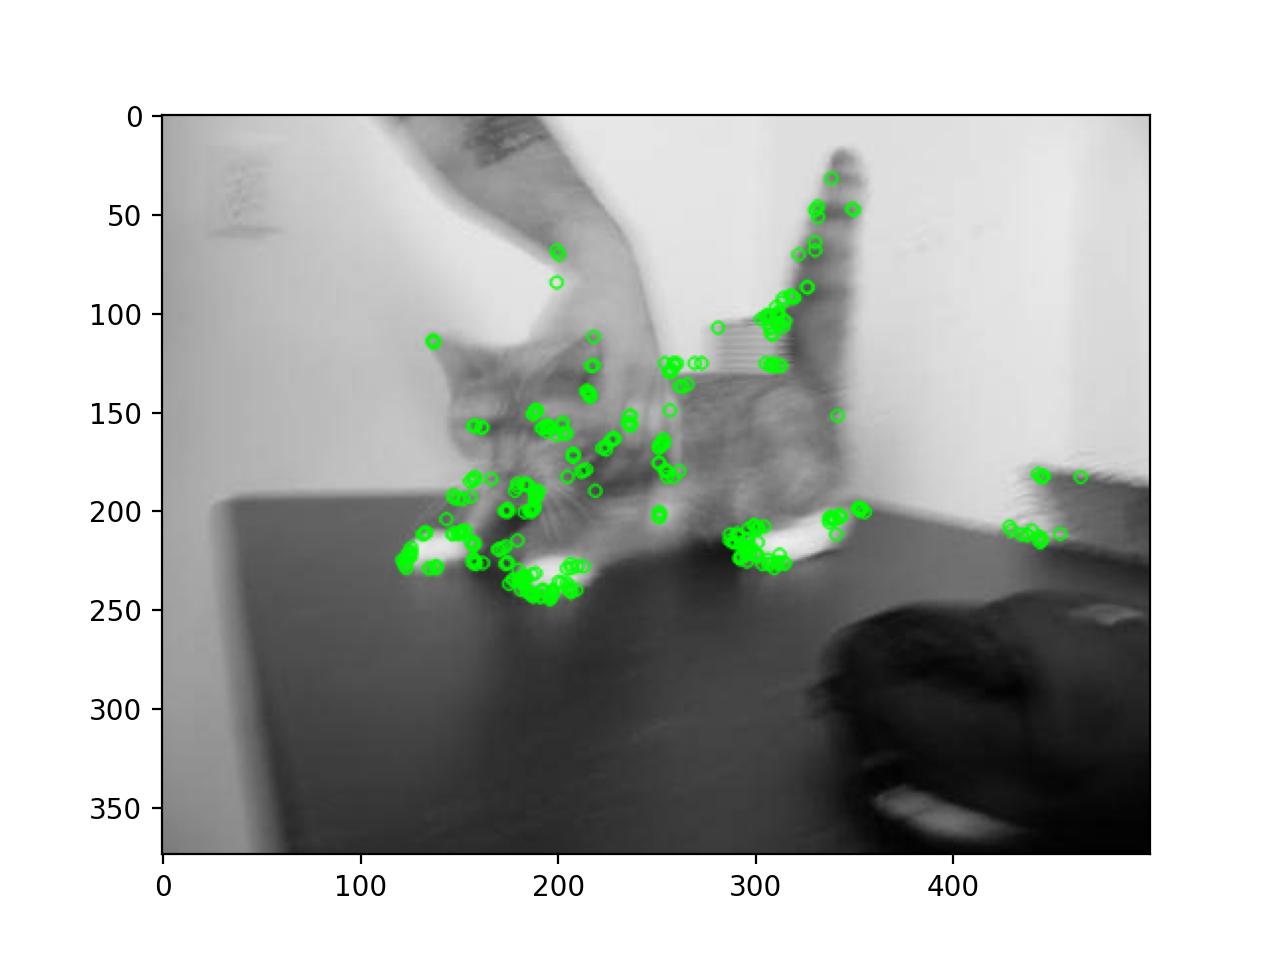

(<matplotlib.image.AxesImage at 0x7ff902a59dc0>, None)

In [17]:
%matplotlib notebook 
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('./data/DogCatChallenge/train/cats/cat.0.jpg',0)


# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

<IPython.core.display.Javascript object>


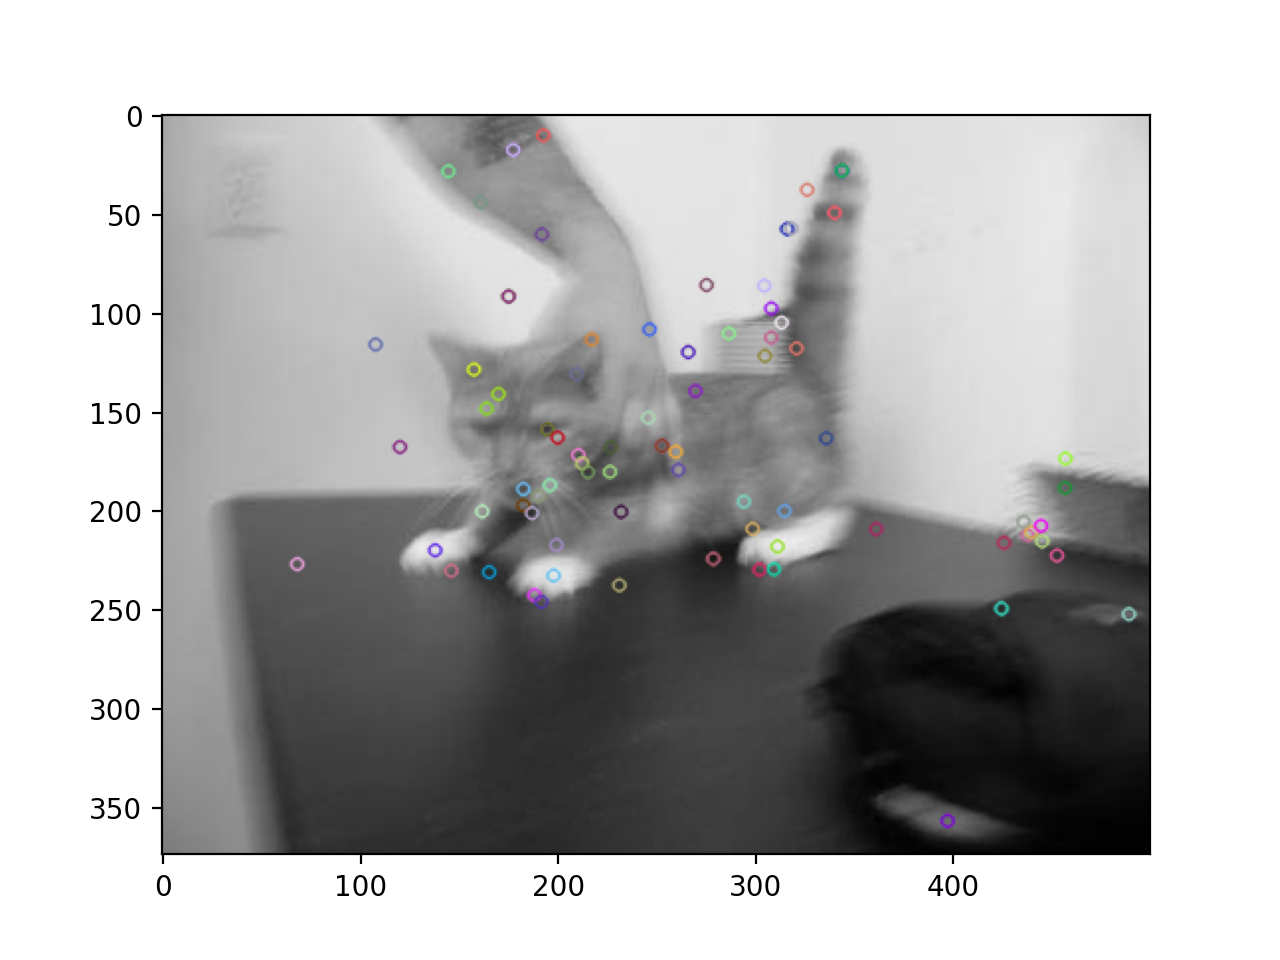

(<matplotlib.image.AxesImage at 0x7ffa32b095b0>, None)

In [18]:
# Avec des sift


img = cv.imread('./data/DogCatChallenge/train/cats/cat.0.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img3=cv.drawKeypoints(gray,kp,img)

plt.imshow(img3), plt.show()

<IPython.core.display.Javascript object>


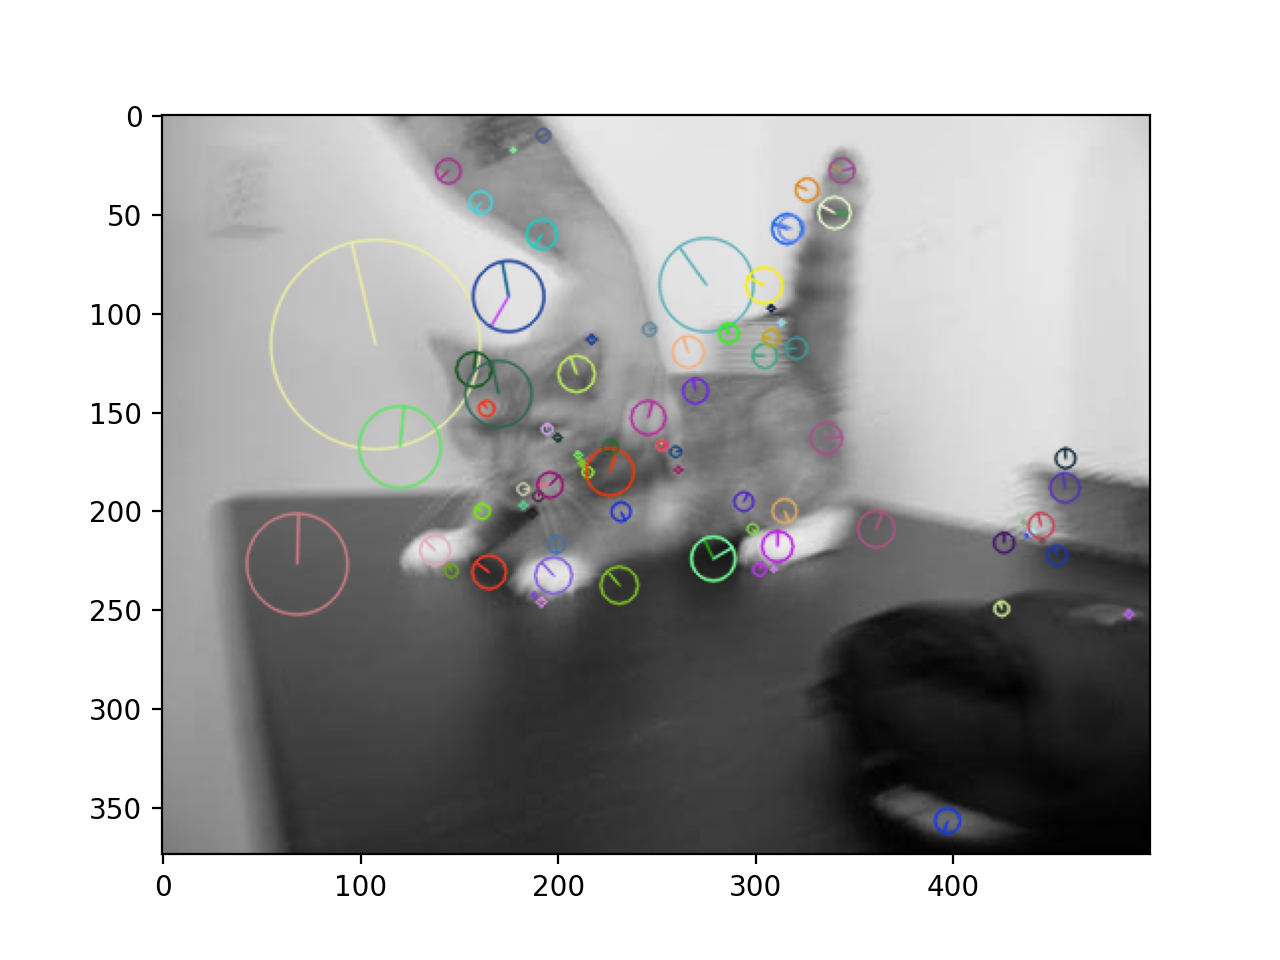

(<matplotlib.image.AxesImage at 0x7ff8e045ce80>, None)

In [19]:
# Avec des sift


img = cv.imread('./data/DogCatChallenge/train/cats/cat.0.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()
kp = sift.detect(gray,None)
# draw with keypoints information
img3=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img3), plt.show()

# Sources and references

+ This study case is inpired from the Lesson 1 of the fast.ai's online course, Practical Deep Learning For Coders : [http://course.fast.ai/](http://course.fast.ai/)
+ Others sources :
    + Stanford CS231n course on Convolutional Neural Networks for Visual Recognition : [http://cs231n.stanford.edu/](http://cs231n.stanford.edu/)
    + Keras blog post on building image classification models [here](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)